In [1]:
from pathlib import Path

from docembedder.models import CountVecEmbedder, TfidfEmbedder
from docembedder.preprocessor.preprocessor import Preprocessor
from docembedder.preprocessor.oldprep import OldPreprocessor
from docembedder.utils import SimulationSpecification, run_models
from docembedder.analysis2 import DocAnalysis, DataModel
from docembedder.visualization import plot_cpc_correlations
from pprint import pprint
import numpy as np

In [2]:
data_dir = Path("..", "data")
output_dir = Path("..", "data", "results")
output_fp = output_dir / "tfidf-compare-old.h5"
cpc_fp = Path(data_dir / "GPCPCs.txt")
patent_dir = Path(data_dir / "unprocessed")
output_dir.mkdir(exist_ok=True)

In [3]:
embedders = {
    "tfidf_new": TfidfEmbedder(),
    "count_sigmoid_old": CountVecEmbedder("sigmoid"),
    "count_prop_old": CountVecEmbedder("prop"),
}

In [4]:
preprocessors = {
    "prep_new": Preprocessor(),
    "prep_old": OldPreprocessor()
}

In [5]:
%%time

sim_spec = SimulationSpecification(1838, 1950, window_size=4, debug_max_patents=1000)
run_models(preprocessors, embedders, sim_spec, patent_dir, output_fp, cpc_fp, n_jobs=10)

tfidf_new <docembedder.models.tfidf.TfidfEmbedder object at 0x7f73bdd64af0>
count_sigmoid_old <docembedder.models.countvec.CountVecEmbedder object at 0x7f73bdd64d90>
count_prop_old <docembedder.models.countvec.CountVecEmbedder object at 0x7f73bdd64e50>


  0%|                                                                   | 0/56 [00:00<?, ?it/s]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow

 55%|████████████████████████████████                          | 31/56 [07:16<11:51, 28.47s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 57%|█████████████████████████████████▏                        | 32/56 [07:36<10:20, 25.84s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 59%|██████████████████████████████████▏                       | 33/56 [07:49<08:29, 22.14s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/models/countvec.py:29: RuntimeWarning: overflow encou

CPU times: user 1.15 s, sys: 3.25 s, total: 4.4 s
Wall time: 16min 51s


336it [00:53,  6.31it/s]


{'prep_new-count_prop_old': 0.06620767603171139,
 'prep_new-count_sigmoid_old': 0.038646158668230325,
 'prep_new-tfidf_new': 0.14286482554704957,
 'prep_old-count_prop_old': 0.06824874506290034,
 'prep_old-count_sigmoid_old': 0.1156698894368338,
 'prep_old-tfidf_new': 0.14587324311219244}


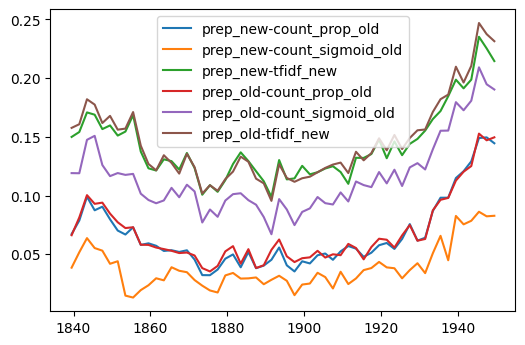

In [6]:
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    correlations = analysis.cpc_correlations()
    pprint({model_name: np.mean(cor["correlations"]) for model_name, cor in correlations.items()})
    plot_cpc_correlations(correlations)